# project three
Data Analytics & Visualization Project Questions

1. What are the summary statistics (mean, median, standard deviation, range, variance) of the numerical columns?
2. What is the distribution of transactions by type?
3. How many unique customers are there?
4. What is the average transaction amount per customer segment?
5. Are there any missing values in the dataset?
6. If missing values exist, how should we handle them? (Imputation or Removal)
7. Are there any duplicate transactions? Remove duplicate transactions if found.
8. Which transactions have outliers based on the transaction amount?
9. Remove transactions that are statistical outliers using the IQR method:
10. Is there a significant difference in transaction amounts between Retail and Corporate customers? (Use t-ttest)
11. Do transaction amounts significantly differ across different customer segments?
12. Visualize the distribution of transaction amounts.
13. Show the count of transactions per type.
14. Compare transaction amounts by customer segment using a boxplot.
15. Show how transaction amounts vary by customer age using a scatter plot.
16. Plot transaction volume trends over time.
17. Can we predict the transaction amount based on customer age and account balance? (Use regression analysis)
18. Does branch location and transaction type impact transaction amount? (Use regression analysis)



In [82]:
# importing the  necessary libraries 
import pandas as pd
# loading the dataset
df=pd.read_csv("C:\\Users\\ADMIN\\Documents\\finance_transactions_dataset.csv")
df

,Transaction ID,Customer ID,Transaction Date,Transaction Type,Amount (KES),Customer Age,Customer Segment,Account Balance (KES),Branch Location,Transaction Channel
0,TXN10000,CUST9239,2023-06-18,Withdrawal,43338.90,46,SME,351628.51,Eldoret,Mobile Banking
1,TXN10001,CUST4289,2023-07-30,Fund Transfer,75336.69,21,Corporate,320554.25,Eldoret,ATM
2,TXN10002,CUST7162,2023-10-30,Loan Payment,18354.97,64,Retail,318417.28,Nairobi,Online
3,TXN10003,CUST5041,2023-09-04,Deposit,91730.05,39,SME,188267.77,Eldoret,Online
4,TXN10004,CUST4878,2023-10-22,Fund Transfer,30669.17,70,Corporate,496011.84,Mombasa,Mobile Banking
...,...,...,...,...,...,...,...,...,...,...
495,TXN10495,CUST3292,2023-04-07,Withdrawal,41579.62,31,SME,31048.96,Eldoret,Bank Teller
496,TXN10496,CUST5287,2023-02-07,Loan Payment,6032.90,46,Retail,489350.07,Kisumu,ATM
497,TXN10497,CUST1723,2023-05-26,Fund Transfer,74537.78,48,Corporate,128889.38,Eldoret,Mobile Banking
498,TXN10498,CUST1902,2023-05-26,Withdrawal,33673.41,32,Retail,245700.81,Mombasa,ATM


In [83]:
df.select_dtypes(include=[np.number])

,Amount (KES),Customer Age,Account Balance (KES)
0,43338.90,46,351628.51
1,75336.69,21,320554.25
2,18354.97,64,318417.28
3,91730.05,39,188267.77
4,30669.17,70,496011.84
...,...,...,...
495,41579.62,31,31048.96
496,6032.90,46,489350.07
497,74537.78,48,128889.38
498,33673.41,32,245700.81


In [85]:
#What are the summary statistics (mean, median, standard deviation, range, variance) of the numerical columns?
import numpy as np

# Selecting only the numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculating summary statistics
summary_stats = {
    'mean': numerical_columns.mean(),
    'median': numerical_columns.median(),
    'std_dev': numerical_columns.std(),
    'range': numerical_columns.max() - numerical_columns.min(),
    'variance': numerical_columns.var}

print(summary_stats)

{'mean': Amount (KES)              49704.55242
Customer Age                 42.70000
Account Balance (KES)    254019.11412
dtype: float64, 'median': Amount (KES)              49661.38
Customer Age                 41.00
Account Balance (KES)    259123.89
dtype: float64, 'std_dev': Amount (KES)              29006.899596
Customer Age                 15.092168
Account Balance (KES)    144286.697980
dtype: float64, 'range': Amount (KES)              99425.47
Customer Age                 52.00
Account Balance (KES)    497155.53
dtype: float64, 'variance': <bound method DataFrame.var of      Amount (KES)  Customer Age  Account Balance (KES)
0        43338.90            46              351628.51
1        75336.69            21              320554.25
2        18354.97            64              318417.28
3        91730.05            39              188267.77
4        30669.17            70              496011.84
..            ...           ...                    ...
495      41579.62           

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4604\1074727160.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Transaction Type', order=df['Transaction Type'].value_counts().index, palette='viridis')


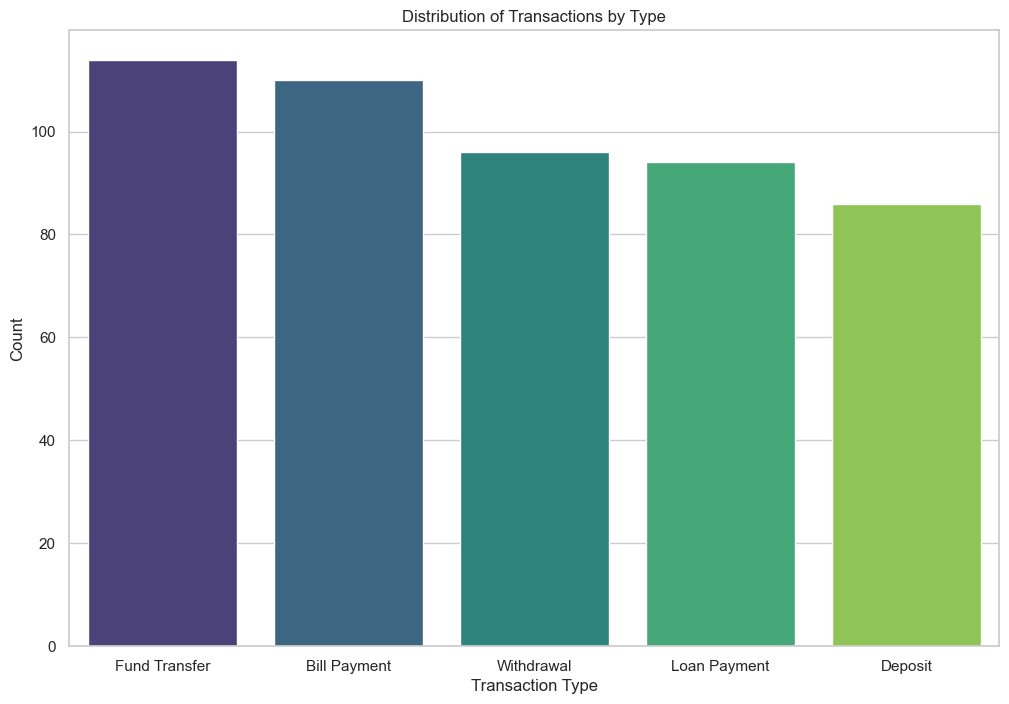

In [86]:
#What is the distribution of transactions by type?
#importing relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Transaction Type', order=df['Transaction Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [87]:
#How many unique customers are there?
# Replacing 'customer_id' with the actual column name that contains customer identifiers
unique_customers = df['Customer ID'].nunique()

print(f'Number of unique customers: {unique_customers}')

Number of unique customers: 484


In [12]:
df['Customer ID'].value_counts().describe()

count    484.000000
mean       1.033058
std        0.178973
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: count, dtype: float64

In [88]:
#What is the average transaction amount per customer segment?
avg_transaction_per_segment=df.groupby('Transaction Type')['Amount (KES)'].mean()
print(f'The Average Transaction per segment:{avg_transaction_per_segment}')

The Average Transaction per segment:Transaction Type
Bill Payment     50371.870818
Deposit          48171.586977
Fund Transfer    48308.894825
Loan Payment     49330.420532
Withdrawal       52336.879167
Name: Amount (KES), dtype: float64


  Transaction Type  Amount (KES)
0     Bill Payment  50371.870818
1          Deposit  48171.586977
2    Fund Transfer  48308.894825
3     Loan Payment  49330.420532
4       Withdrawal  52336.879167


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4604\1454356015.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transaction Type', y='Amount (KES)', data=avg_transaction_per_segment, palette='viridis')


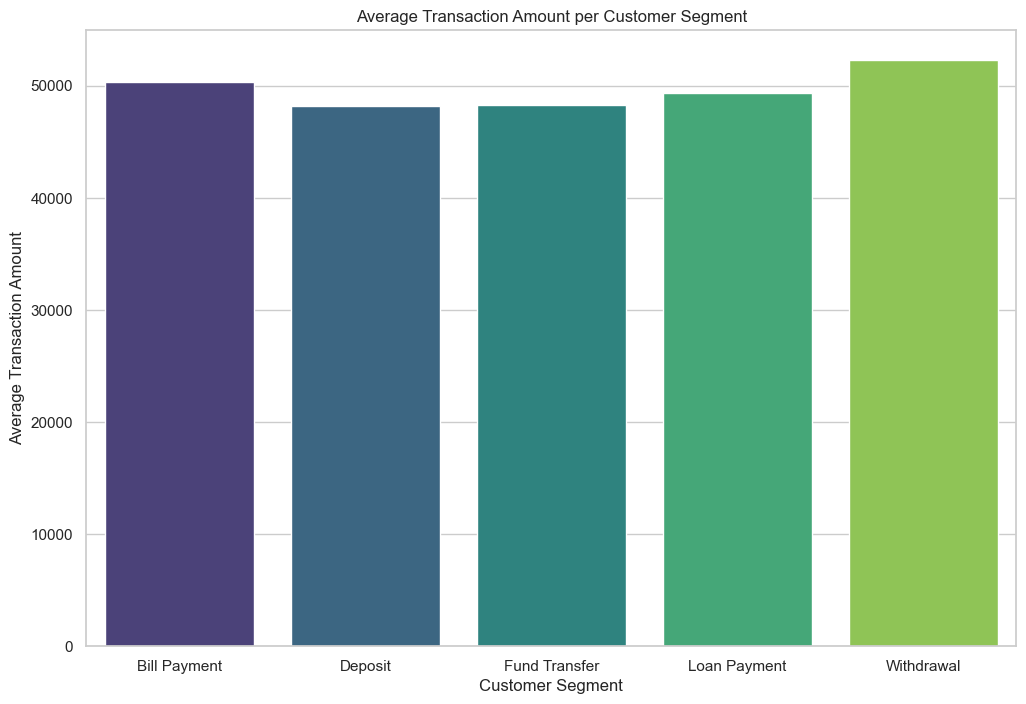

In [89]:
#visualizing the average transaction amount per customer segment
import matplotlib.pyplot as plt
import seaborn as sns

avg_transaction_per_segment = df.groupby('Transaction Type')['Amount (KES)'].mean().reset_index()

# Printing the result
print(avg_transaction_per_segment)

# Visualizing the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Transaction Type', y='Amount (KES)', data=avg_transaction_per_segment, palette='viridis')
plt.title('Average Transaction Amount per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Transaction Amount')
plt.show()

In [17]:
#Are there any missing values in the dataset?
df.isnull().sum()

Transaction ID           0
Customer ID              0
Transaction Date         0
Transaction Type         0
Amount (KES)             0
Customer Age             0
Customer Segment         0
Account Balance (KES)    0
Branch Location          0
Transaction Channel      0
dtype: int64

## observation 
* no missing values 

# If missing values exist, how should we handle them? (Imputation or Removal)
* i would fill the missing values using the mean ,mode or median of the respective variables
* i would also consider dropping the missing values

In [22]:
#Are there any duplicate transactions? Remove duplicate transactions if found.
df.duplicated().sum()

0

# observations
* No duplicates transactions

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3080\1696701197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transaction Channel', y='Amount (KES)', data=df, palette='viridis')


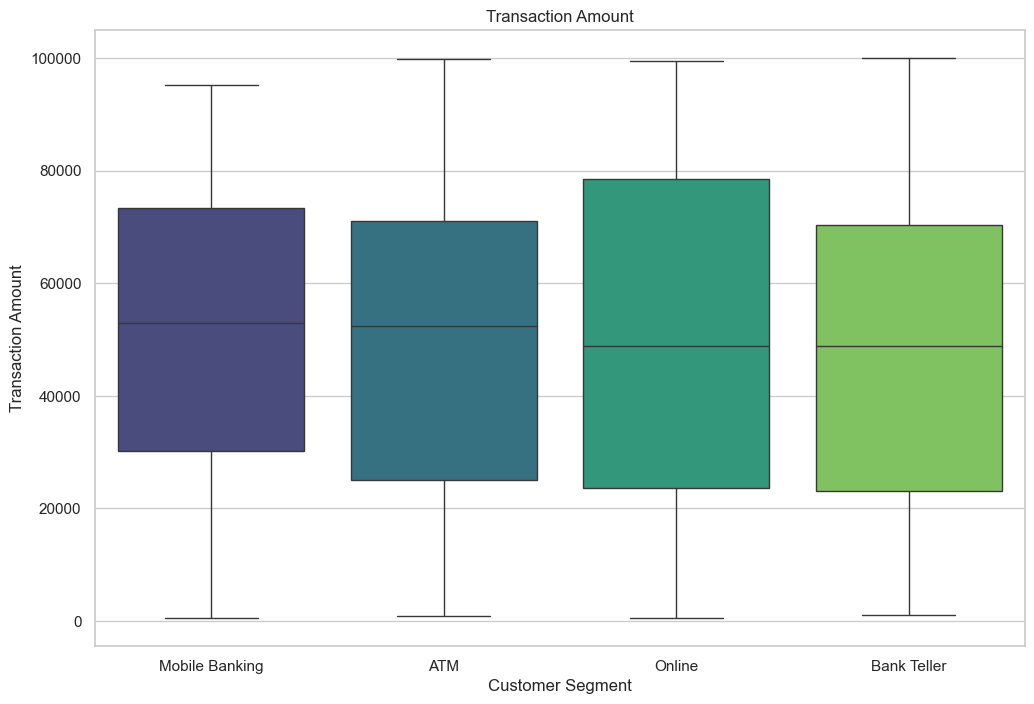

In [30]:
# Which transactions have outliers based on the transaction amount?
# Visualizing the outliers using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Transaction Channel', y='Amount (KES)', data=df, palette='viridis')
plt.title('Transaction Amount')
plt.xlabel('Customer Segment')
plt.ylabel('Transaction Amount')
plt.show()

In [90]:
#Remove transactions that are statistical outliers using the IQR method:
# changing categorical values to numerical
categorical_vars = ['Transaction Channel', 'Transaction Type','Customer Segment']
df_one_hot = pd.get_dummies(df, columns=categorical_vars, drop_first=True)
print(df_one_hot )
# Calculate the frequency of each category
frequency_map = df['Transaction Channel'].value_counts(normalize=True)

# Map the frequencies to the categorical column
df['Transaction Channel_frequency'] = df['Transaction Channel'].map(frequency_map)
df

    Transaction ID Customer ID Transaction Date  Amount (KES)  Customer Age  \
0         TXN10000    CUST9239       2023-06-18      43338.90            46   
1         TXN10001    CUST4289       2023-07-30      75336.69            21   
2         TXN10002    CUST7162       2023-10-30      18354.97            64   
3         TXN10003    CUST5041       2023-09-04      91730.05            39   
4         TXN10004    CUST4878       2023-10-22      30669.17            70   
..             ...         ...              ...           ...           ...   
495       TXN10495    CUST3292       2023-04-07      41579.62            31   
496       TXN10496    CUST5287       2023-02-07       6032.90            46   
497       TXN10497    CUST1723       2023-05-26      74537.78            48   
498       TXN10498    CUST1902       2023-05-26      33673.41            32   
499       TXN10499    CUST6172       2023-11-02      32380.35            36   

     Account Balance (KES) Branch Location  Transac

,Transaction ID,Customer ID,Transaction Date,Transaction Type,Amount (KES),Customer Age,Customer Segment,Account Balance (KES),Branch Location,Transaction Channel,Transaction Channel_frequency
0,TXN10000,CUST9239,2023-06-18,Withdrawal,43338.90,46,SME,351628.51,Eldoret,Mobile Banking,0.220
1,TXN10001,CUST4289,2023-07-30,Fund Transfer,75336.69,21,Corporate,320554.25,Eldoret,ATM,0.290
2,TXN10002,CUST7162,2023-10-30,Loan Payment,18354.97,64,Retail,318417.28,Nairobi,Online,0.274
3,TXN10003,CUST5041,2023-09-04,Deposit,91730.05,39,SME,188267.77,Eldoret,Online,0.274
4,TXN10004,CUST4878,2023-10-22,Fund Transfer,30669.17,70,Corporate,496011.84,Mombasa,Mobile Banking,0.220
...,...,...,...,...,...,...,...,...,...,...,...
495,TXN10495,CUST3292,2023-04-07,Withdrawal,41579.62,31,SME,31048.96,Eldoret,Bank Teller,0.216
496,TXN10496,CUST5287,2023-02-07,Loan Payment,6032.90,46,Retail,489350.07,Kisumu,ATM,0.290
497,TXN10497,CUST1723,2023-05-26,Fund Transfer,74537.78,48,Corporate,128889.38,Eldoret,Mobile Banking,0.220
498,TXN10498,CUST1902,2023-05-26,Withdrawal,33673.41,32,Retail,245700.81,Mombasa,ATM,0.290


In [9]:
# Identifyimg outliers using IQR method
Q1 = df['Transaction Channel_frequency'].quantile(0.25)
Q3 = df['Transaction Channel_frequency'].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['Transaction Channel_frequency'] < lower_bound) | (df['Transaction Channel_frequency'] > upper_bound)]
print("Identified Outliers:")
print(outliers)

# Handling outliers
# Option A: Remove outliers
df_no_outliers = df[(df['Transaction Channel_frequency'] >= lower_bound) & (df['Transaction Channel_frequency'] <= upper_bound)]
print("\nData after removing outliers:")
print(df_no_outliers)

Identified Outliers:
Empty DataFrame
Columns: [Transaction ID, Customer ID, Transaction Date, Transaction Type, Amount (KES), Customer Age, Customer Segment, Account Balance (KES), Branch Location, Transaction Channel, Transaction Channel_frequency]
Index: []

Data after removing outliers:
    Transaction ID Customer ID Transaction Date Transaction Type  \
0         TXN10000    CUST9239       2023-06-18       Withdrawal   
1         TXN10001    CUST4289       2023-07-30    Fund Transfer   
2         TXN10002    CUST7162       2023-10-30     Loan Payment   
3         TXN10003    CUST5041       2023-09-04          Deposit   
4         TXN10004    CUST4878       2023-10-22    Fund Transfer   
..             ...         ...              ...              ...   
495       TXN10495    CUST3292       2023-04-07       Withdrawal   
496       TXN10496    CUST5287       2023-02-07     Loan Payment   
497       TXN10497    CUST1723       2023-05-26    Fund Transfer   
498       TXN10498    CUST190

In [92]:
#Is there a significant difference in transaction amounts between Retail and Corporate customers? (Use t-ttest)
#hO= There is no significant diffrence in retail and corporate customers
#h1=There is significant diffrence in retail and corporate customers
import pandas as pd
from scipy.stats import ttest_ind
# splitting the data into two
retail_amounts = df[df['Customer Segment'] == 'Retail']['Amount (KES)']
corporate_amounts = df[df['Customer Segment'] == 'Corporate']['Amount (KES)']

print("Retail Transaction Amounts:", retail_amounts.tolist())
print("Corporate Transaction Amounts:", corporate_amounts.tolist())
# performing t_test
t_statistic, p_value = ttest_ind(retail_amounts, corporate_amounts)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Retail Transaction Amounts: [18354.97, 29521.0, 49976.22, 6190.75, 69937.95, 24327.47, 19777.72, 17336.4, 47497.36, 35996.28, 63504.49, 30781.65, 82628.75, 53210.75, 25210.88, 26664.17, 87948.16, 51110.66, 85950.31, 56632.25, 96907.5, 66602.18, 9688.44, 25327.91, 23611.05, 7450.7, 37724.42, 31451.75, 28948.78, 32418.21, 79816.06, 2489.88, 8987.11, 83472.9, 16200.03, 94411.65, 6403.52, 59576.47, 86722.25, 66837.13, 56737.61, 55409.54, 42749.84, 48655.82, 72324.07, 47797.4, 43638.19, 88634.16, 92417.09, 32038.92, 56360.22, 25831.58, 48586.19, 66341.61, 4979.36, 67344.91, 53540.83, 39086.91, 7799.69, 89741.57, 61736.08, 48867.32, 34550.52, 16866.0, 11439.13, 2986.95, 9585.18, 78510.07, 54662.34, 64252.42, 41548.67, 32731.71, 65853.69, 4122.24, 81846.54, 64183.49, 49067.92, 85957.42, 67273.33, 52287.62, 81045.07, 85409.58, 23974.06, 57649.53, 35442.85, 82074.96, 27287.02, 8860.18, 86177.31, 29716.38, 8025.36, 21388.4, 24984.26, 64524.9, 20611.78, 68809.75, 10085.91, 13256.55, 86728.04, 115

# observations
## the p-value is 0.265 hence we fail to reject the null hypothesis there is no statistically significant diffrence

In [91]:
#Do transaction amounts significantly differ across different customer segments?
import pandas as pd
from scipy.stats import f_oneway
#  Performing One-Way ANOVA
segments = df['Customer Segment'].unique()
grouped_data = [df[df['Customer Segment'] == segment]['Amount (KES)'] for segment in segments]

f_statistic, p_value = f_oneway(*grouped_data)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpreting Results
if p_value < 0.05:
    print("There is a significant difference in transaction amounts across customer segments.")
else:
    print("There is no significant difference in transaction amounts across customer segments.")


F-statistic: 1.337854123104534
P-value: 0.26335148831894845
There is no significant difference in transaction amounts across customer segments.


In [19]:
f_oneway(*grouped_data)

F_onewayResult(statistic=1.337854123104534, pvalue=0.26335148831894845)

In [18]:
[df[df['Customer Segment'] == segment]['Amount (KES)']for segment in segments]

[0      43338.90
 3      91730.05
 9      54575.61
 15     29072.22
 16     12090.66
          ...   
 477    41716.23
 478    82828.22
 479    40841.09
 489    18073.26
 495    41579.62
 Name: Amount (KES), Length: 184, dtype: float64,
 1      75336.69
 4      30669.17
 5      12422.47
 8      83720.05
 21     81757.42
          ...   
 490    75246.81
 492    11886.47
 493    72055.13
 494    26216.66
 497    74537.78
 Name: Amount (KES), Length: 159, dtype: float64,
 2      18354.97
 6      29521.00
 7      49976.22
 10      6190.75
 11     69937.95
          ...   
 485    57910.64
 491    74515.60
 496     6032.90
 498    33673.41
 499    32380.35
 Name: Amount (KES), Length: 157, dtype: float64]

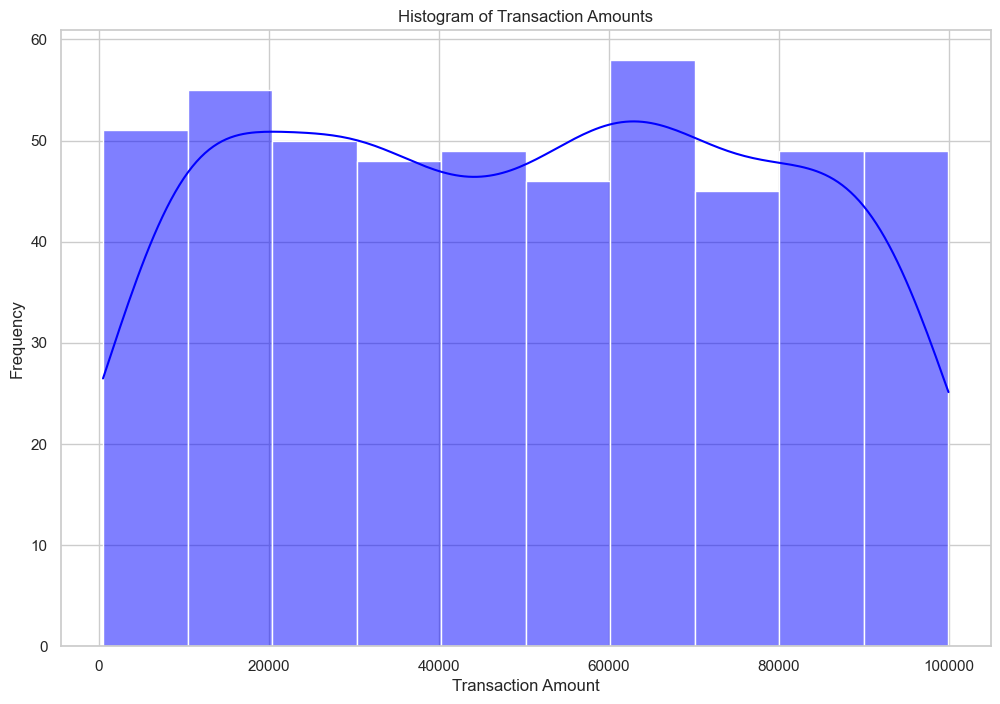

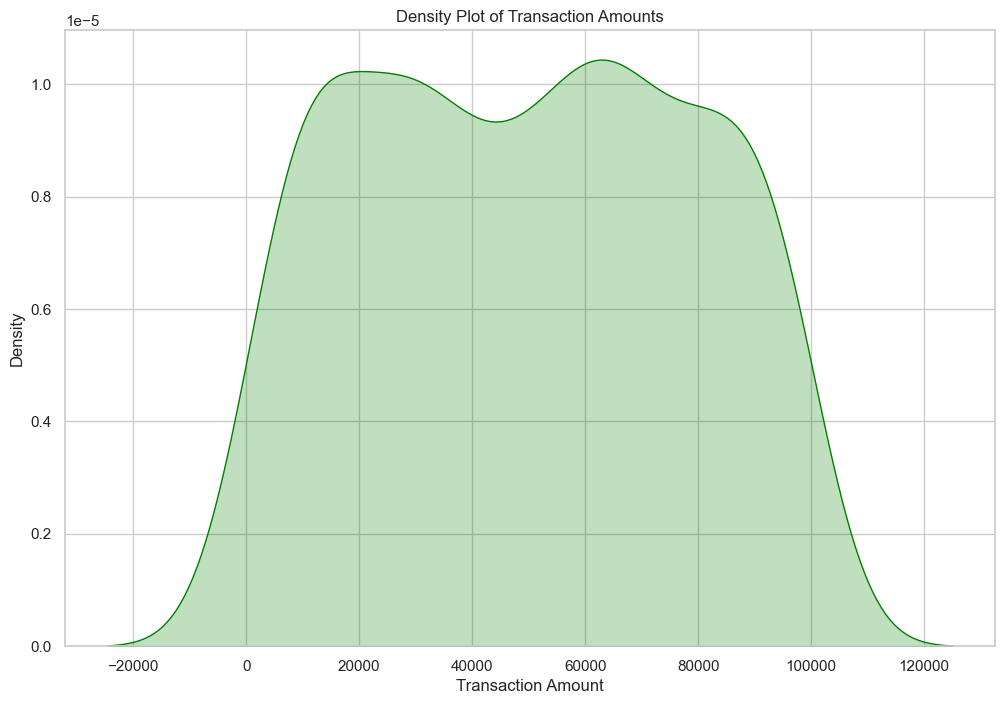

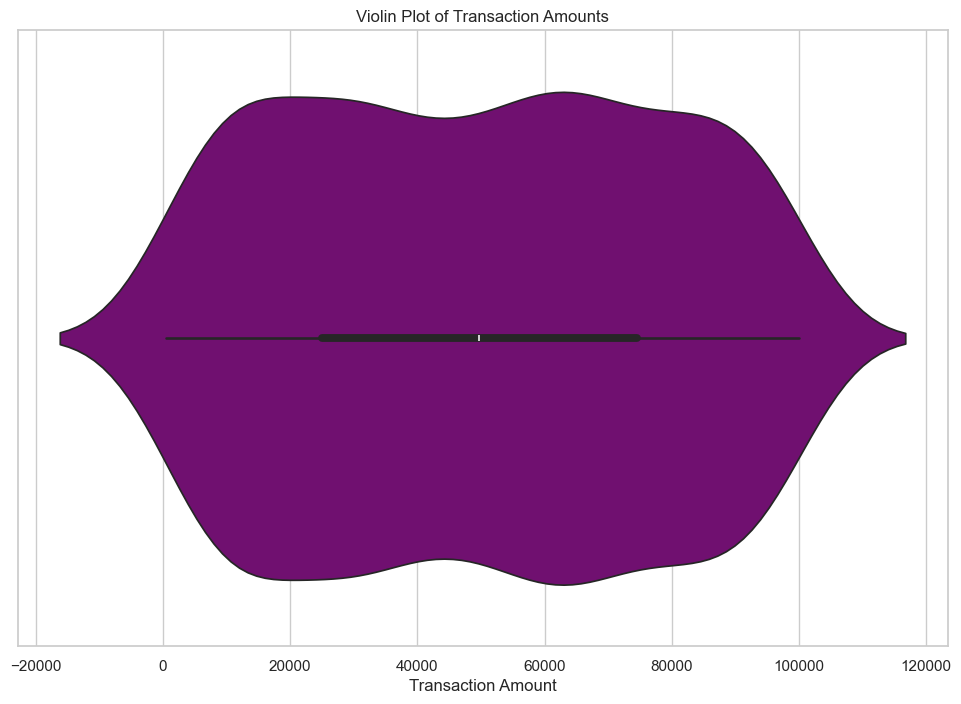

In [26]:
#Visualize the distribution of transaction amounts.
#Visualizing transaction amount Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df['Amount (KES)'], kde=True, bins=10, color='blue')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()
#kde plot
plt.figure(figsize=(12, 8))
sns.kdeplot(df['Amount (KES)'], color='green', fill=True)
plt.title('Density Plot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()
#violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x=df['Amount (KES)'], color='purple')
plt.title('Violin Plot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()

In [31]:
#Show the count of transactions per type.
transaction_count=df['Transaction Type'].value_counts()
print(transaction_count)

Transaction Type
Fund Transfer    114
Bill Payment     110
Withdrawal        96
Loan Payment      94
Deposit           86
Name: count, dtype: int64


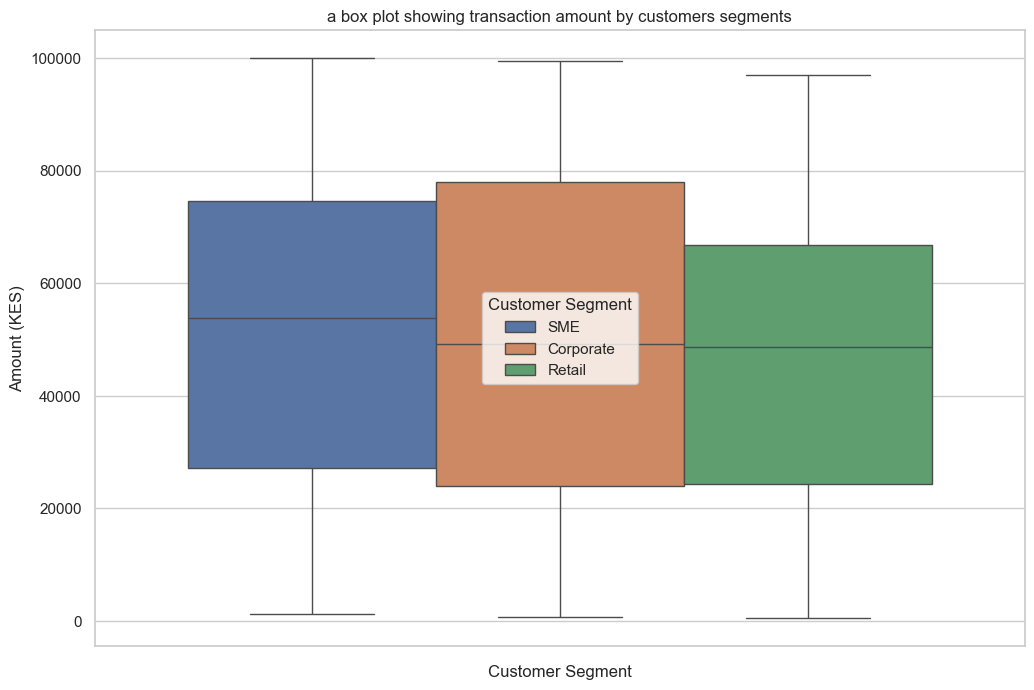

In [36]:
#Compare transaction amounts by customer segment using a boxplot.
plt.figure(figsize=(12,8))
sns.boxplot(data=df,y='Amount (KES)',hue='Customer Segment')
plt.title('a box plot showing transaction amount by customers segments')
plt.xlabel('Customer Segment')
plt.ylabel('Amount (KES)')
plt.show()

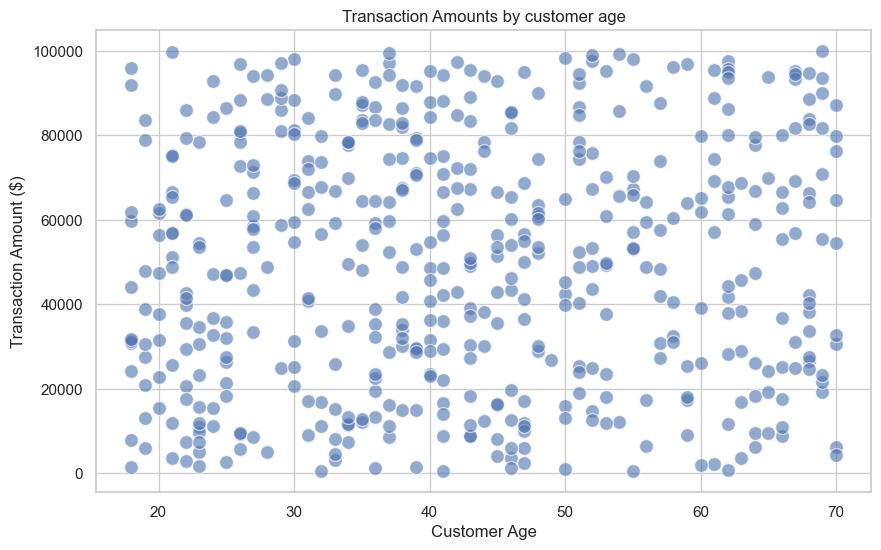

In [39]:
#Show how transaction amounts vary by customer age using a scatter plot.
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Customer Age'], df['Amount (KES)'], alpha=0.6, edgecolors='w', s=100)

# Adding labels and title
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount ($)')
plt.title('Transaction Amounts by customer age')
plt.grid(True)
plt.show()

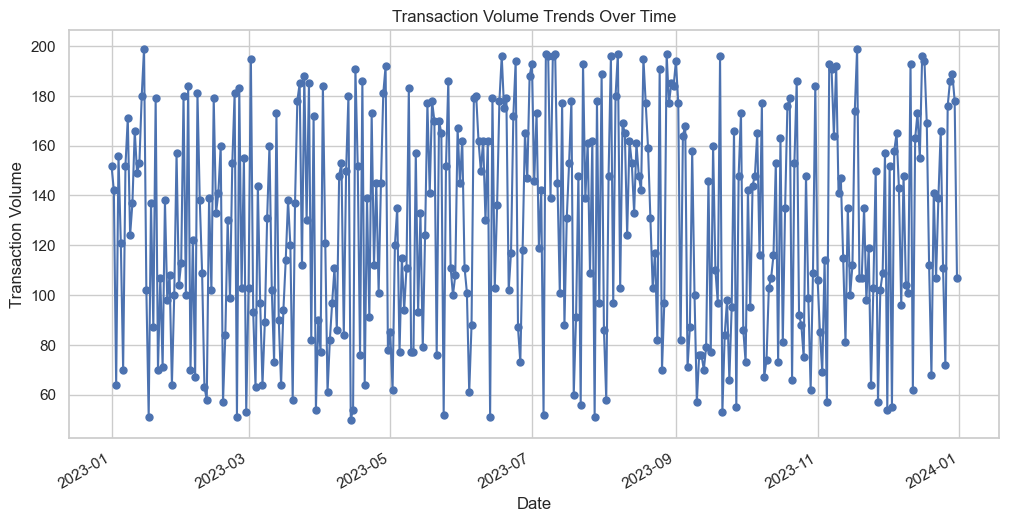

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')  # Daily dates for the year 2023
transaction_volumes = np.random.randint(50, 200, size=len(dates))  # Random transaction volumes between 50 and 200

# Creating a DataFrame
df = pd.DataFrame({
    'Date': dates,
    'TransactionVolume': transaction_volumes
})

# Setting the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plotting the transaction volume trends over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TransactionVolume'], marker='o', linestyle='-', color='b', markersize=5)
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.title('Transaction Volume Trends Over Time')

# Formating the x-axis to show dates nicely
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

Mean Squared Error: 13780.85
R-squared: 1.00


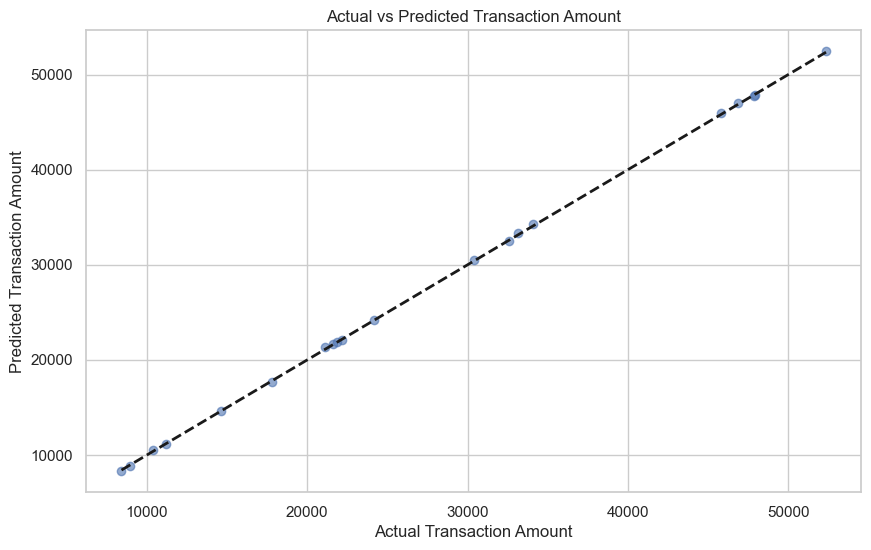

In [79]:
#Can we predict the transaction amount based on customer age and account balance? (Use regression analysis)
#importing relevant libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


np.random.seed(42)
num_customers = 100
ages = np.random.randint(18, 70, size=num_customers)  # Customer ages between 18 and 70
account_balances = np.random.uniform(1000, 1000000, size=num_customers)  # Account balances between $1000 and $10000
transaction_amounts = 50 * ages + 0.05 * account_balances + np.random.normal(0, 100, size=num_customers)  # Simulated transaction amounts

# Create a DataFrame
df = pd.DataFrame({
    'Age': ages,
    'AccountBalance': account_balances,
    'TransactionAmount': transaction_amounts
})

# Features (X) and target (y)
X = df[['Age', 'AccountBalance']]  # Independent variables
y = df['TransactionAmount']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Transaction Amount')
plt.ylabel('Predicted Transaction Amount')
plt.title('Actual vs Predicted Transaction Amount')
plt.show()

In [78]:
 model.predict(X_test)

array([603.07799602, 559.86959504, 464.9035722 , 559.86959504,
       404.8628985 , 404.8628985 , 577.39404217, 404.8628985 ,
       467.26122354, 372.29520071, 404.8628985 , 603.07799602,
       471.78731614, 591.08358302, 577.39404217, 591.08358302,
       379.17894465, 559.86959504, 464.9035722 , 379.17894465,
       464.9035722 , 404.8628985 , 497.47126999, 570.51029823,
       570.51029823, 591.08358302, 496.11756018, 497.47126999,
       372.29520071, 497.47126999, 665.47632107, 404.8628985 ,
       379.17894465, 603.07799602, 528.68525797, 570.51029823,
       497.47126999, 471.78731614, 577.39404217, 467.26122354])

In [80]:
model.predict([[32,30000],[50,4500]])

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3084.34741083, 2718.77046229])

Mean Squared Error: 90009.60
R-squared: -0.22


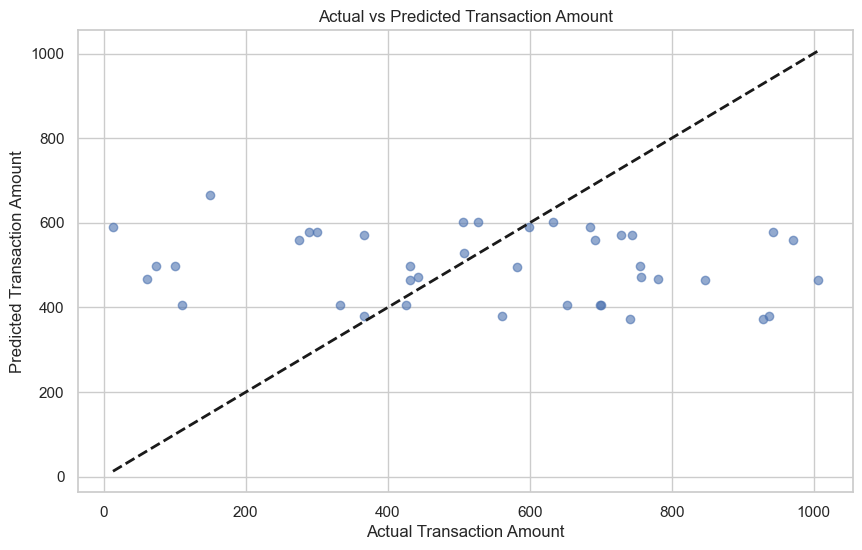

                         Feature  Coefficient
0         BranchLocation_Eldoret   -11.053086
1          BranchLocation_Kisumu    20.160902
2         BranchLocation_Mombasa  -103.661457
3         BranchLocation_Nairobi    94.553640
4        TransactionType_Deposit   -33.604366
5  TransactionType_Fund Transfer   -26.720622
6   TransactionType_Loan Payment    -1.036668
7     TransactionType_Withdrawal    61.361657


In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


np.random.seed(42)
num_transactions = 200
branch_locations = np.random.choice(['Eldoret', 'Nairobi', 'Kisumu','Mombasa'], size=num_transactions)  # Branch locations
transaction_types = np.random.choice(['Withdrawal', 'Deposit', 'Fund Transfer','Loan Payment'], size=num_transactions)  # Transaction types
transaction_amounts = np.random.uniform(10, 1000, size=num_transactions)  # Transaction amounts between $10 and $1000

# Simulate impact of branch location and transaction type on transaction amount
transaction_amounts += np.where(branch_locations == 'Eldoret', 50, 0)  # Branch_A adds $50
transaction_amounts += np.where(transaction_types == 'Withdrawal', -20, 0)  # Withdrawals reduce by $20

# Create a DataFrame
df = pd.DataFrame({
    'BranchLocation': branch_locations,
    'TransactionType': transaction_types,
    'TransactionAmount': transaction_amounts
})

# Encode categorical variables (BranchLocation and TransactionType) using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['BranchLocation', 'TransactionType'])
    ],
    remainder='drop'  # Drop other columns
)

# Features (X) and target (y)
X = df[['BranchLocation', 'TransactionType']]  # Independent variables
y = df['TransactionAmount']  # Dependent variable

# Apply one-hot encoding to the features
X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Transaction Amount')
plt.ylabel('Predicted Transaction Amount')
plt.title('Actual vs Predicted Transaction Amount')
plt.show()

# Display model coefficients
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['BranchLocation', 'TransactionType'])
coefficients = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Coefficient': model.coef_
})
print(coefficients)